## Homework 1 answer

by Rahma Hayuning Astuti

In [28]:
### Prepare libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Question 1

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

In [30]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [31]:
len(df.columns)

19

In [32]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01


#### Answer: 19

### Question 2

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

    32.59
    42.59
    52.59
    62.59


In [33]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.duration

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
3066761   0 days 00:13:59
3066762   0 days 00:19:27
3066763   0 days 00:24:31
3066764   0 days 00:13:00
3066765   0 days 00:14:24
Name: duration, Length: 3066766, dtype: timedelta64[us]

In [34]:
#df.duration already in timedelta. So, now convert to minutes
df['duration_minutes'] = df.duration.dt.total_seconds() / 60

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_minutes
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,...,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,0 days 00:13:59,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,...,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,0 days 00:19:27,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,...,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,0 days 00:24:31,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,...,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,0 days 00:13:00,13.000000


In [35]:
#find standasrd deviations

df['duration_minutes'].std()

42.59435124195458

#### Answer: 42.59

### Question 3

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


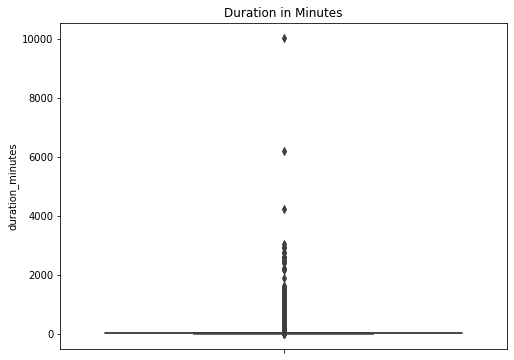

In [36]:
#let's see the distribution to find outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['duration_minutes'])
plt.title('Duration in Minutes')
plt.show()

In [37]:
#now let's remove it and only use betwee 1 and 60.

new_df = df[(df.duration_minutes >= 1) & (df.duration_minutes <= 60)]
new_df.shape

(3009173, 21)

In [38]:
new_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_minutes
count,3.009173e+06,3009173,3009173,2.938068e+06,3.009173e+06,2.938068e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,2.938068e+06,2.938068e+06,3009173,3.009173e+06
mean,1.729855e+00,2023-01-17 00:34:19.090805,2023-01-17 00:48:31.382655,1.361619e+00,3.783685e+00,1.423694e+00,1.666243e+02,1.645131e+02,1.184650e+00,1.789434e+01,1.546403e+00,4.912155e-01,3.327611e+00,4.886258e-01,9.851232e-01,2.650305e+01,2.294732e+00,1.029695e-01,0 days 00:14:12.291848,1.420486e+01
min,1.000000e+00,2022-10-25 00:42:10,2022-10-25 00:44:22,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-5.800000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-5.835000e+02,-2.500000e+00,-1.250000e+00,0 days 00:01:00,1.000000e+00
25%,1.000000e+00,2023-01-09 16:26:19,2023-01-09 16:40:24,1.000000e+00,1.090000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.545000e+01,2.500000e+00,0.000000e+00,0 days 00:07:13,7.216667e+00
50%,2.000000e+00,2023-01-17 08:45:30,2023-01-17 08:59:46,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.740000e+00,0.000000e+00,1.000000e+00,2.013000e+01,2.500000e+00,0.000000e+00,0 days 00:11:33,1.155000e+01
75%,2.000000e+00,2023-01-24 16:33:29,2023-01-24 16:48:53,1.000000e+00,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,4.140000e+00,0.000000e+00,1.000000e+00,2.830000e+01,2.500000e+00,0.000000e+00,0 days 00:18:11,1.818333e+01
max,2.000000e+00,2023-02-01 00:56:53,2023-02-01 01:06:43,8.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.990000e+02,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.000000e+03,2.500000e+00,1.250000e+00,0 days 01:00:00,6.000000e+01
std,4.440346e-01,NaN,NaN,8.954235e-01,2.519560e+02,6.051629e+00,6.424609e+01,6.989129e+01,5.129361e-01,1.621241e+01,1.783131e+00,9.314787e-02,3.645204e+00,1.934030e+00,1.669544e-01,2.053547e+01,7.377791e-01,3.480707e-01,0 days 00:09:56.363137,9.939386e+00


In [39]:
#find fraction of it
fraction_left = len(new_df) / len(df)
print('Fraction left: ', fraction_left)

Fraction left:  0.9812202822125979


#### Answer: 98%

### Question 4

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

    Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
    Fit a dictionary vectorizer
    Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [40]:
new_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration',
       'duration_minutes'],
      dtype='object')

In [41]:
categorical = ['PULocationID', 'DOLocationID']
new_df[categorical] = new_df[categorical].astype(str)

C:\Users\asus\AppData\Local\Temp/ipykernel_17312/513316085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[categorical] = new_df[categorical].astype(str)


In [42]:
#convert to list dictionaries
list_of_dicts = new_df[categorical].to_dict(orient='records')

#Fit a dictionary vectorizer
vectorizer = DictVectorizer()
one_hot_encoded = vectorizer.fit_transform(list_of_dicts)

#get number of columns
num_features = one_hot_encoded.shape[1]
print(num_features)

515


#### Answer: 515

### Question 5

Now let's use the feature matrix from the previous step to train a model.

    Train a plain linear regression model with default parameters
    Calculate the RMSE of the model on the training data

What's the RMSE on train?


In [51]:
target = 'duration_minutes'

X_train = one_hot_encoded
y_train = new_df[target].values

#train linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train, y_pred)))

7.649261929201487


#### Answer: 7.64

### Question 6

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [52]:
categorical = ['PULocationID', 'DOLocationID']

def prepare_data(filename):
    df = pd.read_parquet(filename)

    #make duration and duration_minutes columns
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration_minutes'] = df.duration.dt.total_seconds() / 60

    new_df = df[(df.duration_minutes >= 1) & (df.duration_minutes <= 60)]
    new_df[categorical] = new_df[categorical].astype(str)

    return new_df

In [53]:
df_train = prepare_data('./data/yellow_tripdata_2023-01.parquet')
df_val = prepare_data('./data/yellow_tripdata_2023-02.parquet')

C:\Users\asus\AppData\Local\Temp/ipykernel_17312/3691053102.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[categorical] = new_df[categorical].astype(str)
C:\Users\asus\AppData\Local\Temp/ipykernel_17312/3691053102.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[categorical] = new_df[categorical].astype(str)


In [54]:
print(df_train.shape)
print(df_val.shape)

(3009173, 21)
(2855951, 21)


In [58]:
#for training data
#convert to list dictionaries
train_dicts = df_train[categorical].to_dict(orient='records')

#Fit a dictionary vectorizer
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(train_dicts)

In [59]:
#for val
#convert to list dictionaries
val_dicts = df_val[categorical].to_dict(orient='records')

#Fit a dictionary vectorizer
X_val = vectorizer.transform(val_dicts)

In [60]:
target = 'duration_minutes'

y_train = df_train[target].values
y_val = df_val[target].values

#train linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

print(np.sqrt(mean_squared_error(y_val, y_pred)))

7.811819793542861


#### Answer: 7.81